<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84/01_01_diff_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1x-_OoADek99ihs5cWZeFrMuTKFxRuXhR

## 직접 미분

$$
f(x) = (x^2 + 2x) \log x
$$

In [3]:
def f(x):
    return (x**2 + 2*x)*np.log(x)

In [4]:
def df(x):
    return 2*(x+1)*np.log(x) + (x+2)

## 수치미분

### 일변수

In [8]:
##############################################################
# 스칼라 함수에 대한 수치 미분
##############################################################

def numer_deriv_scalar(x, fun, args=(), h=None, method="central"):
    """
    x     : 미분계수를 구할 위치
    fun   : 미분계수를 구할 함수
    args  : fun넘겨줄 위치 인자묶음
    h     : 작은 변위값
    method: 수치 미분 방법 central, forward
    """
    # [1] 초기화
    g = 0.0
    m = 1

    # [2] h 결정 대충 변수의 1%정도
    # https://en.wikipedia.org/wiki/Numerical_differentiation
    if h == None:
        h = np.sqrt(np.finfo(np.float32).eps) if x == 0.0 else np.sqrt(np.finfo(np.float32).eps) * x

    # [3] 변량 설정
    dx1 = x+h
    dx2 = x

    # [4] central일 경우 dx2 설정
    if method == "central":
        dx2 = x-h
        m = 2

    # [5] 미분계수 계산 fun이 스칼라 함수여도 요소 한개짜리 ndarray로 전달되면 문제없음
    g = (fun(dx1, *args) - fun(dx2, *args)) / (m*h)

    return g



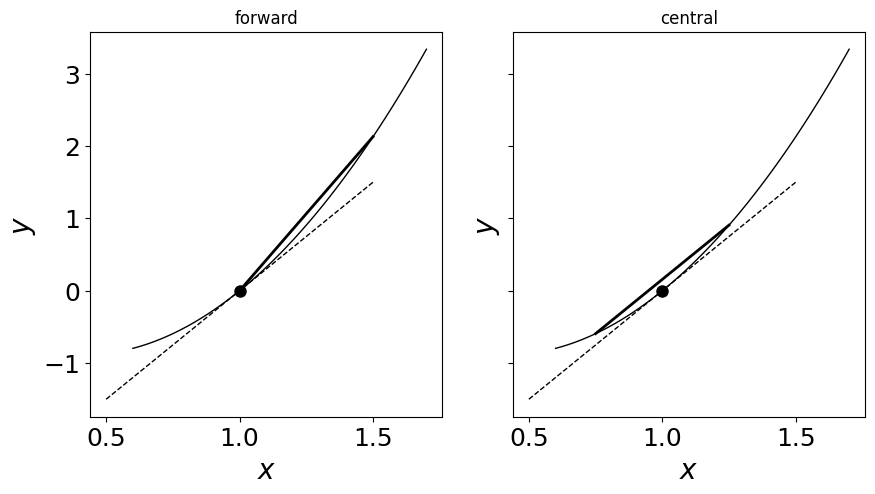

foward difference : 4.257384
central difference: 5.990252


In [6]:
##############################################################
# 그림으로 전방차분과 중앙차분 확인
##############################################################

f2  = lambda x : (x**2 + 2*x)*np.log(x)
df2 = lambda x : (2*x+2)*np.log(x) + (x+2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

x = np.linspace(0.6, 1.7, 100)
x0 = 1.0
h = 0.5

ax1.plot(x, f2(x), color='k', lw=1)
ax1.set_title("forward")
ax1.plot(x0, f2(x0), 'o', markersize=8, color='k', zorder=3)
ax1.plot([x0-h, x0+h], [f2(x0)-df2(x0)*h, f2(x0)+df2(x0)*h], '--', lw=1, color='k')
ax1.plot([x0, x0+h], [f2(x0), f2(x0+h)], lw=2, color='k')
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r'$y$', fontsize=20)

ax2.plot(x, f2(x), color='k', lw=1)
ax2.set_title("central")
ax2.plot(x0, f2(x0), 'o', markersize=8, color='k', zorder=3)
ax2.plot([x0-h, x0+h], [f2(x0)-df2(x0)*h, f2(x0)+df2(x0)*h], '--', lw=1, color='k')
ax2.plot([x0-h/2, x0+h/2], [f2(x0-h/2), f2(x0+h/2)], lw=2, color='k')
ax2.set_xlabel(r'$x$', fontsize=20)
ax2.set_ylabel(r'$y$', fontsize=20)

plt.show()

print(f"foward difference : {numer_deriv_scalar(1, f2, h=h, method='forward'):.6f}")
print(f"central difference: {numer_deriv_scalar(1, f2, h=h, method='central'):.6f}")

### 수치미분 응용

In [9]:
# 히든 펑션 임포트
from hidden import hidden_f

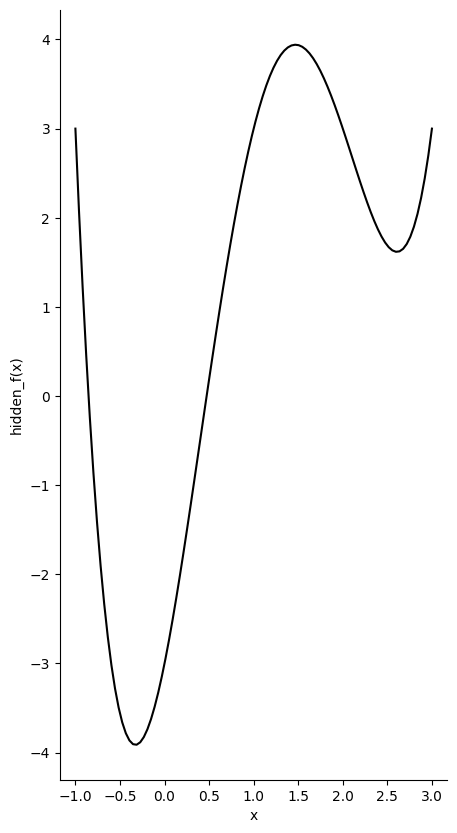

In [10]:
x = np.linspace(-1,3,100)

fig = plt.figure(figsize=(5,10))
ax = plt.axes()
ax.plot(x, hidden_f(x), c='k')

ax.axis('equal')
# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel('x')
ax.set_ylabel('hidden_f(x)')
plt.show()

In [11]:
# 무식공격(brute force) 방식으로 최솟값 찾기
def brute_force(f, x, d, max_iter, sols) :
    """
    x : initial point
    d  : positive interval
    """
    for i in range(max_iter):
        c = f(x)

        # 좌우점 계산하고 새로운 점으로 업데이트하기[+]
        left, right = f(x-d), f(x+d)

        if left < c :
            x = x-d
        elif right < c :
            x = x+d
        else:
            print(left, c, right)
            break

        print("iter:{:d}, f(x)={:f}, x={:f}".format(i+1, f(x), x))
        sols.append((x, f(x)))

    return x


iter:1, f(x)=0.119903, x=0.490000
iter:2, f(x)=0.052124, x=0.480000
iter:3, f(x)=-0.015818, x=0.470000
iter:4, f(x)=-0.083905, x=0.460000
iter:5, f(x)=-0.152119, x=0.450000
iter:6, f(x)=-0.220439, x=0.440000
iter:7, f(x)=-0.288847, x=0.430000
iter:8, f(x)=-0.357323, x=0.420000
iter:9, f(x)=-0.425847, x=0.410000
iter:10, f(x)=-0.494400, x=0.400000
iter:11, f(x)=-0.562961, x=0.390000
iter:12, f(x)=-0.631509, x=0.380000
iter:13, f(x)=-0.700023, x=0.370000
iter:14, f(x)=-0.768484, x=0.360000
iter:15, f(x)=-0.836869, x=0.350000
iter:16, f(x)=-0.905157, x=0.340000
iter:17, f(x)=-0.973326, x=0.330000
iter:18, f(x)=-1.041354, x=0.320000
iter:19, f(x)=-1.109220, x=0.310000
iter:20, f(x)=-1.176900, x=0.300000
iter:21, f(x)=-1.244372, x=0.290000
iter:22, f(x)=-1.311613, x=0.280000
iter:23, f(x)=-1.378601, x=0.270000
iter:24, f(x)=-1.445310, x=0.260000
iter:25, f(x)=-1.511719, x=0.250000
iter:26, f(x)=-1.577802, x=0.240000
iter:27, f(x)=-1.643537, x=0.230000
iter:28, f(x)=-1.708897, x=0.220000
ite

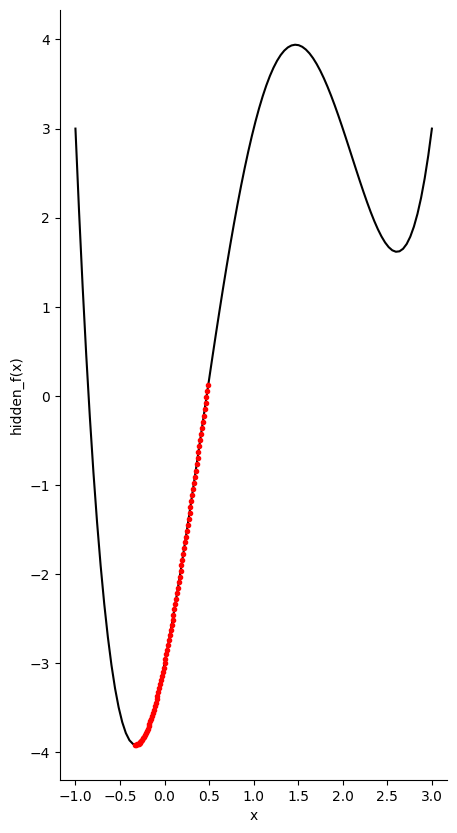

In [12]:
# −0.326345

sols = []
brute_force(hidden_f, 0.5, 0.01, 1500, sols)
# brute_force(hidden_f, 0.5, 0.001, 1500, sols)

x = np.linspace(-1,3,100)
fig = plt.figure(figsize=(5,10))
ax = plt.axes()
ax.plot(x, hidden_f(x), c='k')

ax.axis('equal')
# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel('x')
ax.set_ylabel('hidden_f(x)')


sols = np.asarray(sols)
plt.plot(sols[:,0], sols[:,1], '.', c='r')
plt.show()

In [19]:
def df(x):
    dx = 0.0
    ############################################################################
    # WRITE YOUR CODE HERE[*]
    # df에 함수 hidden_f의 미분계수를 정의하세요.
    # hidden_f의 식을 알 수 없기 때문에 어떤 방식으로
    # 미분 계수를 정의할 수 있을지 생각해보고 적당히
    # 미분 계수를 정의 하세요.
    dx = (hidden_f(x+0.01) - hidden_f(x)) / 0.01

    return dx


In [21]:
def simple_grad_descent(x, f, df, eta, sols, stop=0.01, max_iter=200) :
    """
    This function is simple 1D gradient descent
    x        : Initial point
    f        : Objective function
    df       : Derivative
    eta      : step size
    sols     : List for update history
    stop     : stop criterion
    max_iter : Maximum number of iterations to prevent infinite loops
    """
    c = 100         # 임의 설정된 초기 기울기
    i = 0         # 반복 번수

    while np.abs(c) > stop and i < max_iter:
        ########################################################################
        # WRITE YOUR CODE HERE[*]
        # 이 함수는 간단한 일변수 함수에 대한 경사 하강법을 실행하는 함수입니다.
        # 경사하강법을 성공적으로 수행하기 위해서는
        # 다음 두 단계를 정의 해야 합니다.

        # 1. c에 미분계수를 계산하여 c에 할당하고
        c = df(x)

        # 2. x를 업데이트 하세요.
        x = x - eta*c
        ########################################################################

        sols.append((x, f(x)))
        print("iter:{:d}, |c|={:f}, f(x)={:f}, x={:f}".format(i+1, np.abs(c), f(x), x))
        i+=1

iter:1, |c|=6.739701, f(x)=-0.271033, x=0.432603
iter:2, |c|=6.838701, f(x)=-0.739629, x=0.364216
iter:3, |c|=6.848592, f(x)=-1.205737, x=0.295730
iter:4, |c|=6.759418, f(x)=-1.655750, x=0.228136
iter:5, |c|=6.566658, f(x)=-2.076418, x=0.162469
iter:6, |c|=6.272683, f(x)=-2.456407, x=0.099742
iter:7, |c|=5.887342, f(x)=-2.787642, x=0.040869
iter:8, |c|=5.427397, f(x)=-3.066114, x=-0.013405
iter:9, |c|=4.914763, f(x)=-3.291959, x=-0.062553
iter:10, |c|=4.373897, f(x)=-3.468836, x=-0.106292
iter:11, |c|=3.828893, f(x)=-3.602837, x=-0.144580
iter:12, |c|=3.300939, f(x)=-3.701259, x=-0.177590
iter:13, |c|=2.806587, f(x)=-3.771528, x=-0.205656
iter:14, |c|=2.357042, f(x)=-3.820424, x=-0.229226
iter:15, |c|=1.958337, f(x)=-3.853670, x=-0.248809
iter:16, |c|=1.612139, f(x)=-3.875811, x=-0.264931
iter:17, |c|=1.316832, f(x)=-3.890279, x=-0.278099
iter:18, |c|=1.068634, f(x)=-3.899568, x=-0.288786
iter:19, |c|=0.862560, f(x)=-3.905430, x=-0.297411
iter:20, |c|=0.693161, f(x)=-3.909064, x=-0.304

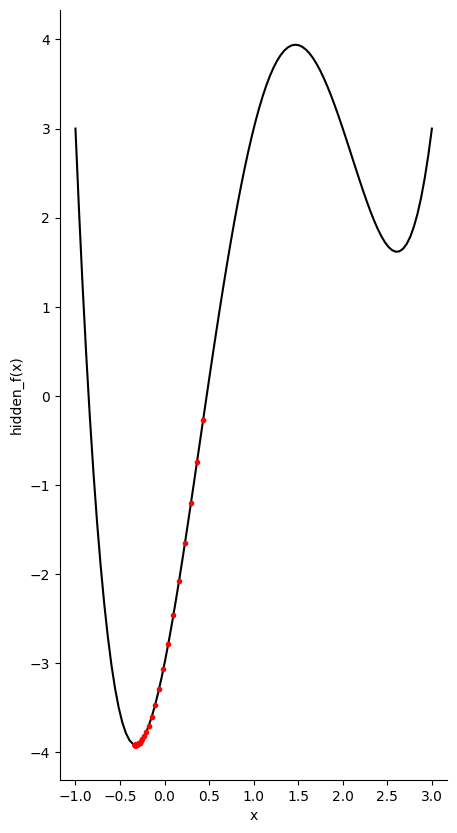

In [22]:
x0 = 0.5           # 탐색을 시작할 초기값
eta = 0.01       # 이동 거리
sols = []

simple_grad_descent(x0, hidden_f, df, eta, sols, max_iter=1000)

x = np.linspace(-1,3,100)
fig = plt.figure(figsize=(5,10))
ax = plt.axes()
ax.plot(x, hidden_f(x), c='k')

ax.axis('equal')
# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel('x')
ax.set_ylabel('hidden_f(x)')

sols = np.asarray(sols)
plt.plot(sols[:,0], sols[:,1], '.', c='r')
plt.show()

### 다변수

In [16]:
def numer_deriv(x, fun, args=(), h=None, method="central", dtype='float32'):
    """
    Find the first derivative of a function at a point x.

    x     : The point at which derivative is found.
    fun   : Input function.
    args  : Tuple extra arguments passed to fun.
    h     : Step size
    method: 'central' or 'forward'
    dtype : Data type of gradient, must be set to 'longdouble'
            if numerically unstable.
    """

    # [1] 필요변수 초기화
    scalar = False
    m = 1

    # [2] x가 스칼라인지 벡터인지 확인 스칼라면 무조건 벡터로 고치고 시작
    if not hasattr(type(x), '__iter__'):
        x = np.array([x])
        scalar = True

    # [3] x 타입을 디폴트로 float32로 변경
    x = x.astype(dtype)

    # [4] 미분 계수 초기화
    g = np.zeros(x.shape[0]).astype(dtype)

    # [5] 미분계수를 변수 개수만큼 루프를 돌면서 구하기
    for i in range(x.shape[0]) :
        # [5-1*]변경된 위치를 설정할 변수 두개를 준비
        # dx1[i], dx2[i]로 각 변수의 요소를 접근할 수 있음


        # [5-2] h 결정 대충 변수의 1%정도
        # https://en.wikipedia.org/wiki/Numerical_differentiation
        if h == None:
            h = np.sqrt(np.finfo(np.float32).eps) if x[i] == 0.0 else np.sqrt(np.finfo(np.float32).eps) * x[i]

        ##########################################
        # WRITE YOUR CODE HERE
        # [5-3*] dx1[i] 변경

        # [5-4*] central이면 dx[2]도 함께 변경, 이 때 m = 2로 설정해서
        # [5-5]에서 g[i]를 계산할 때 2h로 나누게 해야함.

        # [5-5*] 미분계수 계산
        # fun이 스칼라 함수여도 요소 한개짜리 ndarray로 전달되면 문제없이
        # 호출되므로 여기거 fun은 fun(dx1, *args) 식으로 호출되면 됨

        ##########################################

    # [6] 결과값 리턴
    if scalar:
        return g[0]
    else:
        return g

In [17]:
def f_xy(x):
    return (x[0]**2 + 2*x[0])*np.log(x[1])

In [18]:
numer_deriv(np.array([1,2]), f_xy)

array([0., 0.], dtype=float32)